# CACF Télephonie/Mail :

In [23]:
import pandas as pd
import numpy as np

# Chargement des deux fichiers csv (téléphonie et mail) autant que dataframe
df = pd.read_csv("telephonie.csv")
df_mail = pd.read_csv("mail.csv")


df.head()

,id,date_appel,entite,famille,nombre_entrants_corrige
0,12,2019-01-02,Entite 1,F2,165
1,13,2019-01-02,Entite 1,F3,54
2,14,2019-01-02,Entite 1,F4,1
3,15,2019-01-02,Entite 1,F5,99
4,16,2019-01-02,Entite 1,F6,1487


# Analyse des appels téléphonique :

## Nettoyage et préparation :

### remplacement des virgules par des points :

In [24]:
df[df['nombre_entrants_corrige'].str.contains(',')]

,id,date_appel,entite,famille,nombre_entrants_corrige
3454,3466,2019-08-01,Entite 1,F5,"83,779710145"
3455,3467,2019-08-01,Entite 1,F6,"1001,1652601"
3456,3468,2019-08-01,Entite 1,F7,"660,76233184"
3457,3469,2019-08-01,Entite 2,F1,"1871,7116345"
3458,3470,2019-08-01,Entite 2,F2,"877,72159091"
...,...,...,...,...,...
23778,23790,2023-02-15,Entite 5,F2,"708,32971246"
23779,23791,2023-02-15,Entite 5,F3,"738,93587571"
23780,23792,2023-02-15,Entite 5,F5,"463,64218009"
23781,23793,2023-02-15,Entite 5,F6,"694,32144026"


In [25]:
df['nombre_entrants_corrige'] = df['nombre_entrants_corrige'].str.replace(',','.')
df[df['nombre_entrants_corrige'].str.contains('.')]

,id,date_appel,entite,famille,nombre_entrants_corrige
0,12,2019-01-02,Entite 1,F2,165
1,13,2019-01-02,Entite 1,F3,54
2,14,2019-01-02,Entite 1,F4,1
3,15,2019-01-02,Entite 1,F5,99
4,16,2019-01-02,Entite 1,F6,1487
...,...,...,...,...,...
23778,23790,2023-02-15,Entite 5,F2,708.32971246
23779,23791,2023-02-15,Entite 5,F3,738.93587571
23780,23792,2023-02-15,Entite 5,F5,463.64218009
23781,23793,2023-02-15,Entite 5,F6,694.32144026


### Modification des types des colonnes :

In [26]:
# les types avant transformation
df.dtypes

id                          int64
date_appel                 object
entite                     object
famille                    object
nombre_entrants_corrige    object
dtype: object

In [27]:
# colonne de 'id' en objet
df['id'] = df['id'].astype(str)

# colonne de 'date_appel' en date
df['date_appel'] = pd.to_datetime(df['date_appel'])

# colonne 'nombre_entrants_corrige' en numéric
df['nombre_entrants_corrige'] = pd.to_numeric(df['nombre_entrants_corrige'], errors='coerce')

# arrondir les chiffres et transformation en int
df['nombre_entrants_corrige'] = df['nombre_entrants_corrige'].round().astype(int)

# les types après transformation
df.dtypes

id                                 object
date_appel                 datetime64[ns]
entite                             object
famille                            object
nombre_entrants_corrige             int64
dtype: object

## Analyse exploratoire :

### Colonne par colonne :

#### Date appel :

In [28]:
df.head()

,id,date_appel,entite,famille,nombre_entrants_corrige
0,12,2019-01-02,Entite 1,F2,165
1,13,2019-01-02,Entite 1,F3,54
2,14,2019-01-02,Entite 1,F4,1
3,15,2019-01-02,Entite 1,F5,99
4,16,2019-01-02,Entite 1,F6,1487


In [29]:
# le dataset se termine en :
df['date_appel'].max()

Timestamp('2023-02-15 00:00:00')

In [30]:
# le dataset commence en :
df['date_appel'].min()

Timestamp('2019-01-02 00:00:00')

#### Entités :

In [31]:
df['entite'].value_counts()

Entite 5    7498
Entite 1    7135
Entite 2    3779
Entite 3    3246
Entite 4    2125
Name: entite, dtype: int64

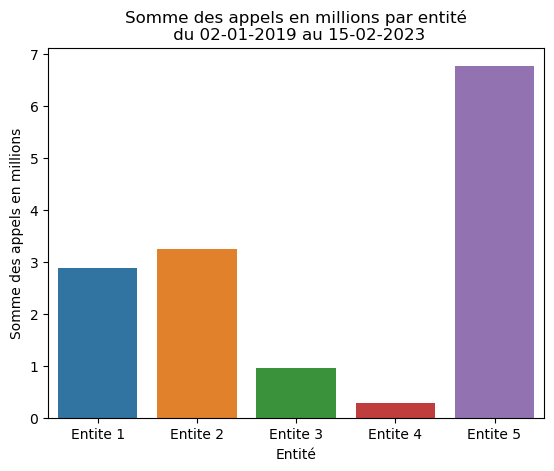

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# un group by la somme des nombre d'appels 
sum_calls = df.groupby('entite')['nombre_entrants_corrige'].sum().reset_index()

# division des sommes par 1 million pour une meilleure visualisation
sum_calls['nombre_entrants_corrige'] = sum_calls['nombre_entrants_corrige'] / 1000000

sns.barplot(data=sum_calls, x='entite', y='nombre_entrants_corrige')

# Labeliser le graph graph
plt.xlabel('Entité')
plt.ylabel('Somme des appels en millions')
plt.title('Somme des appels en millions par entité\n du 02-01-2019 au 15-02-2023')


plt.show()

#### Familles (type de flux):

Text(0.5, 1.0, 'Somme des appels en millions par type de flux\n du 02-01-2019 au 15-02-2023')

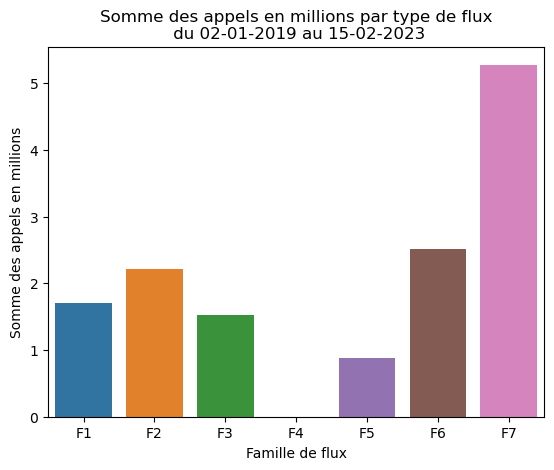

In [33]:
# un group by la somme des nombre d'appels 
sum_calls = df.groupby('famille')['nombre_entrants_corrige'].sum().reset_index()

# division des sommes par 1 million pour une meilleure visualisation
sum_calls['nombre_entrants_corrige'] = sum_calls['nombre_entrants_corrige'] / 1000000

sns.barplot(data=sum_calls, x='famille', y='nombre_entrants_corrige')

# Labeliser le graph graph
plt.xlabel('Famille de flux')
plt.ylabel('Somme des appels en millions')
plt.title('Somme des appels en millions par type de flux\n du 02-01-2019 au 15-02-2023')

In [34]:
df['famille'].value_counts()

F2    4799
F7    4711
F5    4609
F3    3748
F1    3275
F6    2508
F4     133
Name: famille, dtype: int64

### Analyse bivariée :

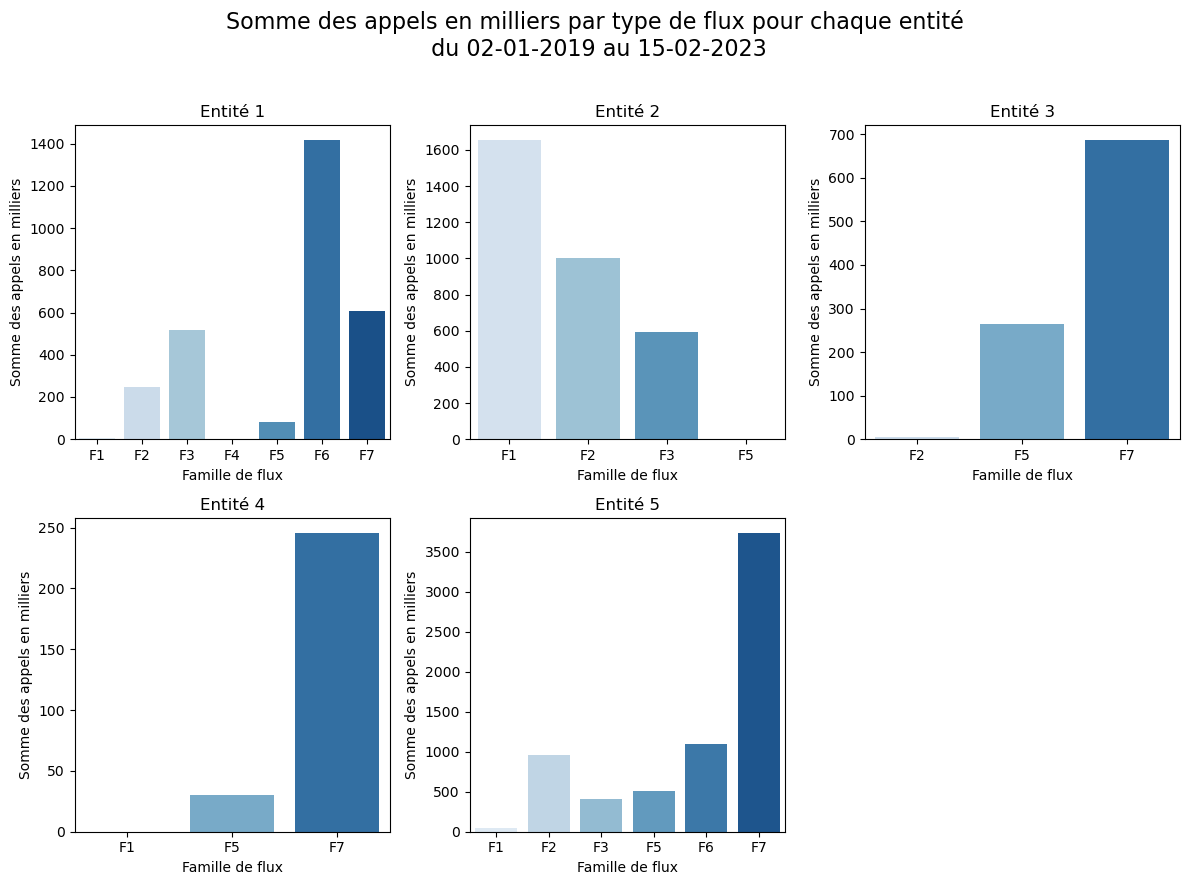

In [35]:
# création des subplots en 2 ligne et 3 colonnes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# applatir le array des axes
axes = axes.flatten()

# itérer sur les 5 entités
for i in range(1, 6):
    # faire le groupby et l'aggregation
    sum_calls = df[df['entite'] == f'Entite {i}'].groupby('famille')['nombre_entrants_corrige'].sum().reset_index()
    # dimunier la taille des chiffres
    sum_calls['nombre_entrants_corrige'] = sum_calls['nombre_entrants_corrige'] / 1000

    # Creation des subplot
    sns.barplot(data=sum_calls, x='famille', y='nombre_entrants_corrige', ax=axes[i - 1], palette='Blues')
    axes[i - 1].set_xlabel('Famille de flux')
    axes[i - 1].set_ylabel('Somme des appels en milliers')
    axes[i - 1].set_title(f'Entité {i}')

# cacher les subplots vides restants
if len(axes) > 5:
    for j in range(5, len(axes)):
        fig.delaxes(axes[j])

# ajustements des espaces entre les subplot
plt.tight_layout()

#titre global
plt.suptitle('Somme des appels en milliers par type de flux pour chaque entité\n du 02-01-2019 au 15-02-2023', fontsize=16, y=1.10)


# afficher le plot
plt.show()

## Analyses dans temps :

### Entités :

In [36]:
# séparation des entité en 5 dataframe de la forme "Ex"

for i in range(1,6):
 
    exec(f"E{i} = df[df['entite'] == 'Entite {i}'][['entite', 'famille', 'nombre_entrants_corrige','date_appel']]")



In [37]:
# séparation des familles en plusieurs dataframe de la forme "ExFy"


for e in range(1,6):    
    for f in range(1,8):
    
        exec(f"E{e}F{f} = E{e}[E{e}['famille'] == 'F{f}'][['entite', 'famille', 'nombre_entrants_corrige','date_appel']].reset_index(drop=True)")


#### Entité 1 :

##### les familles par an :

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


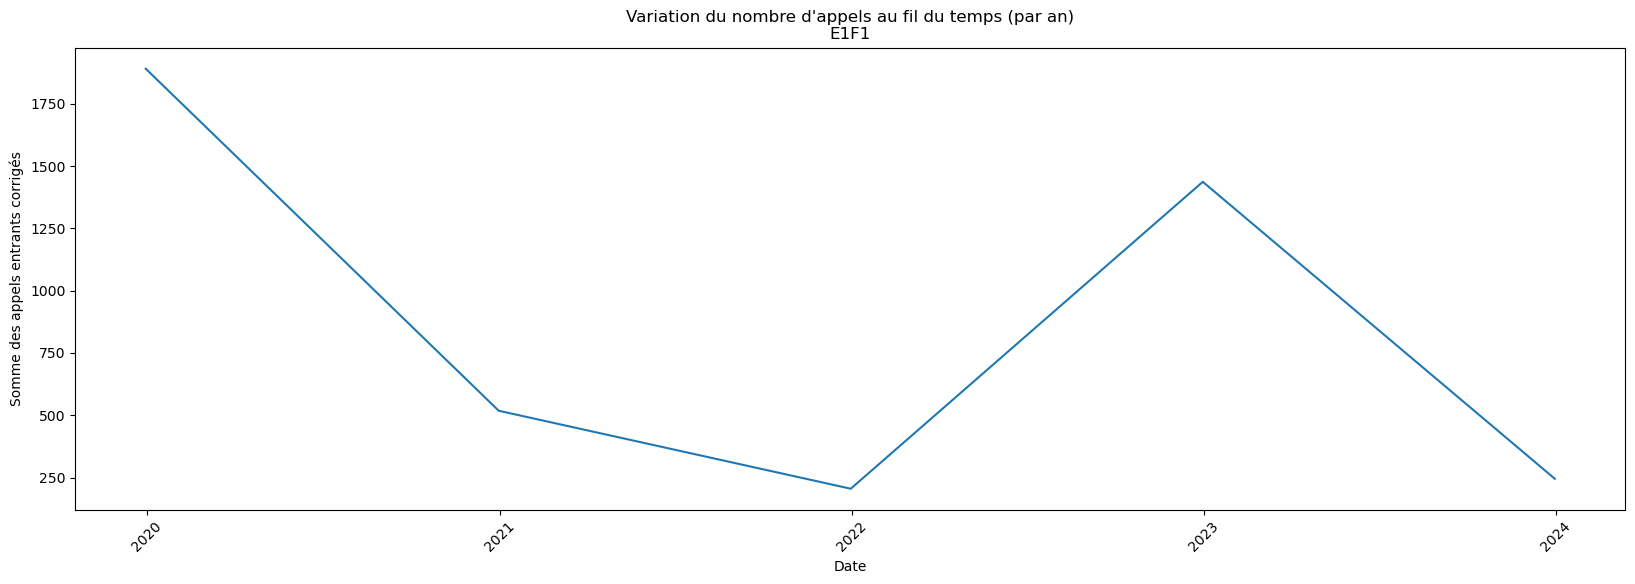

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


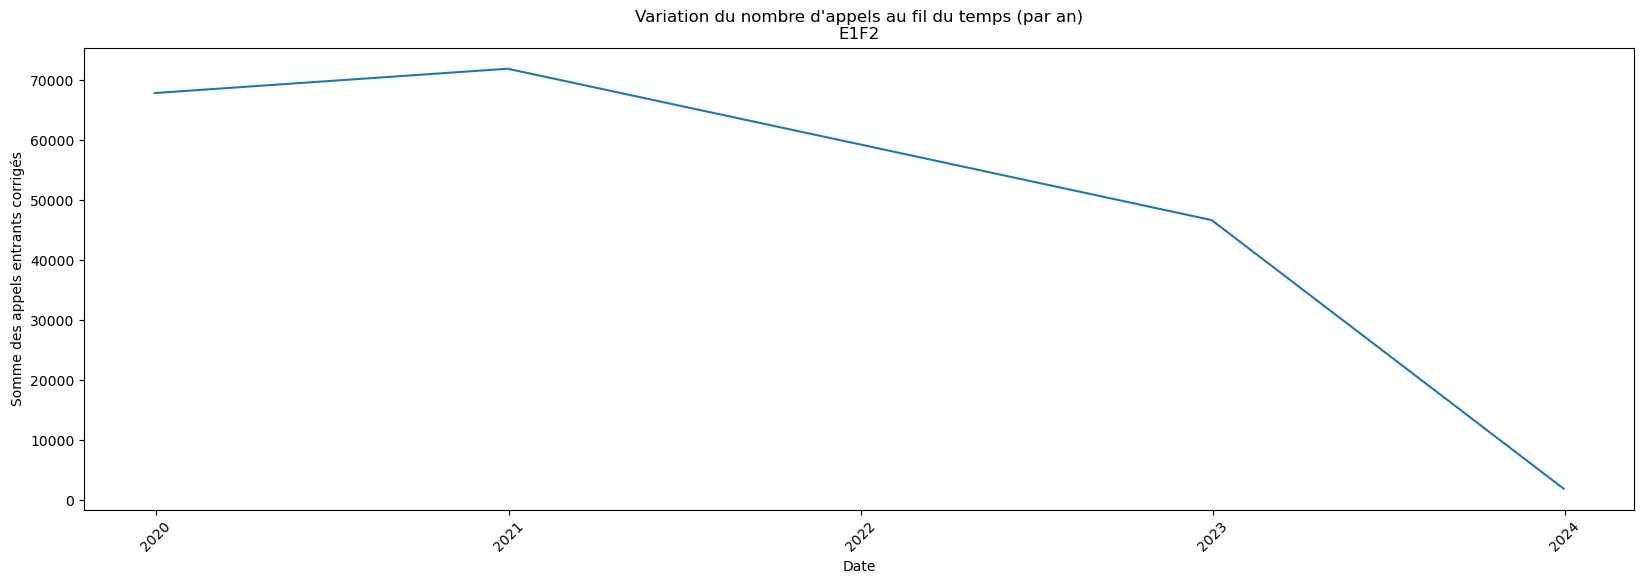

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


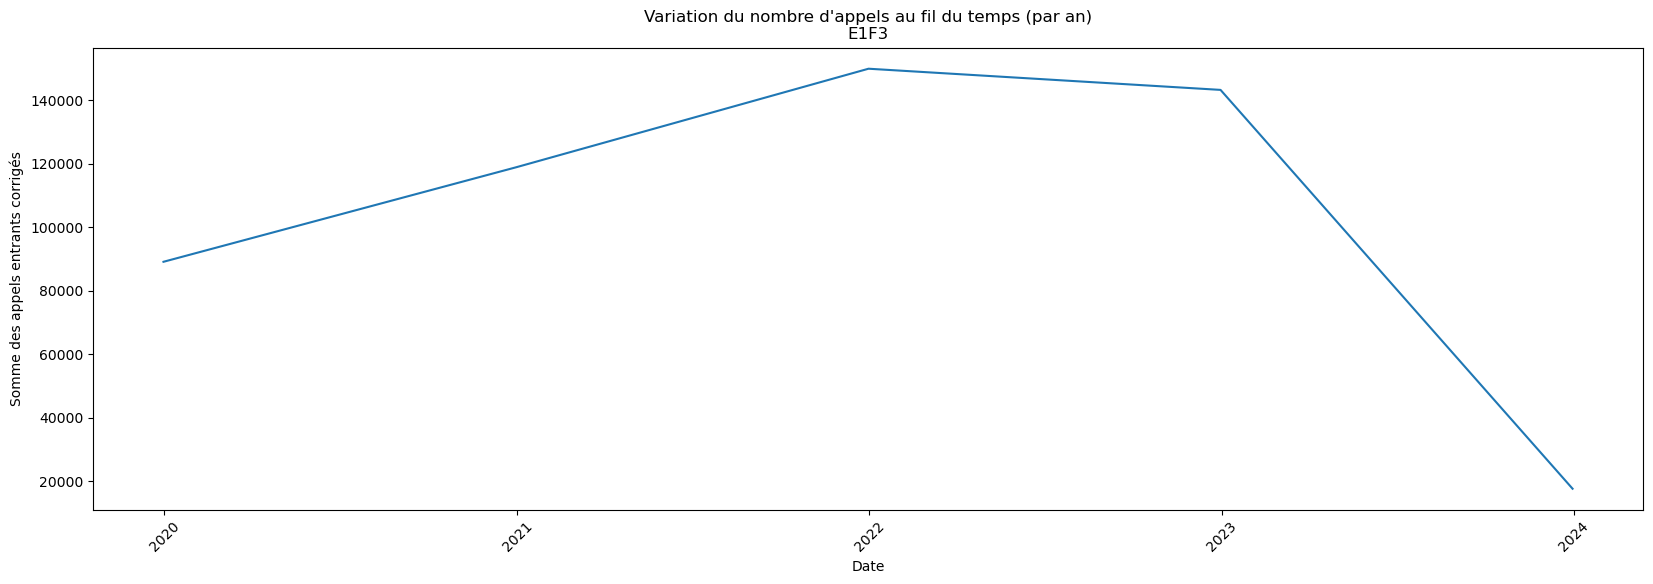

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


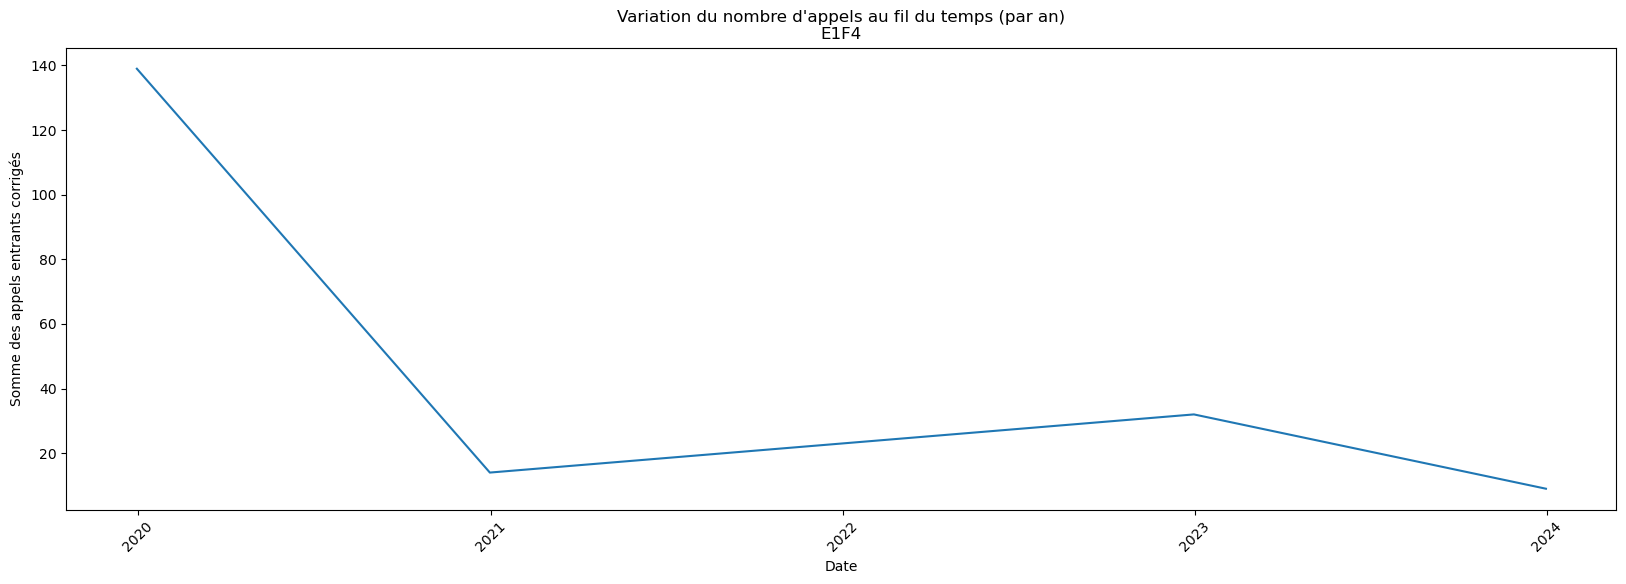

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


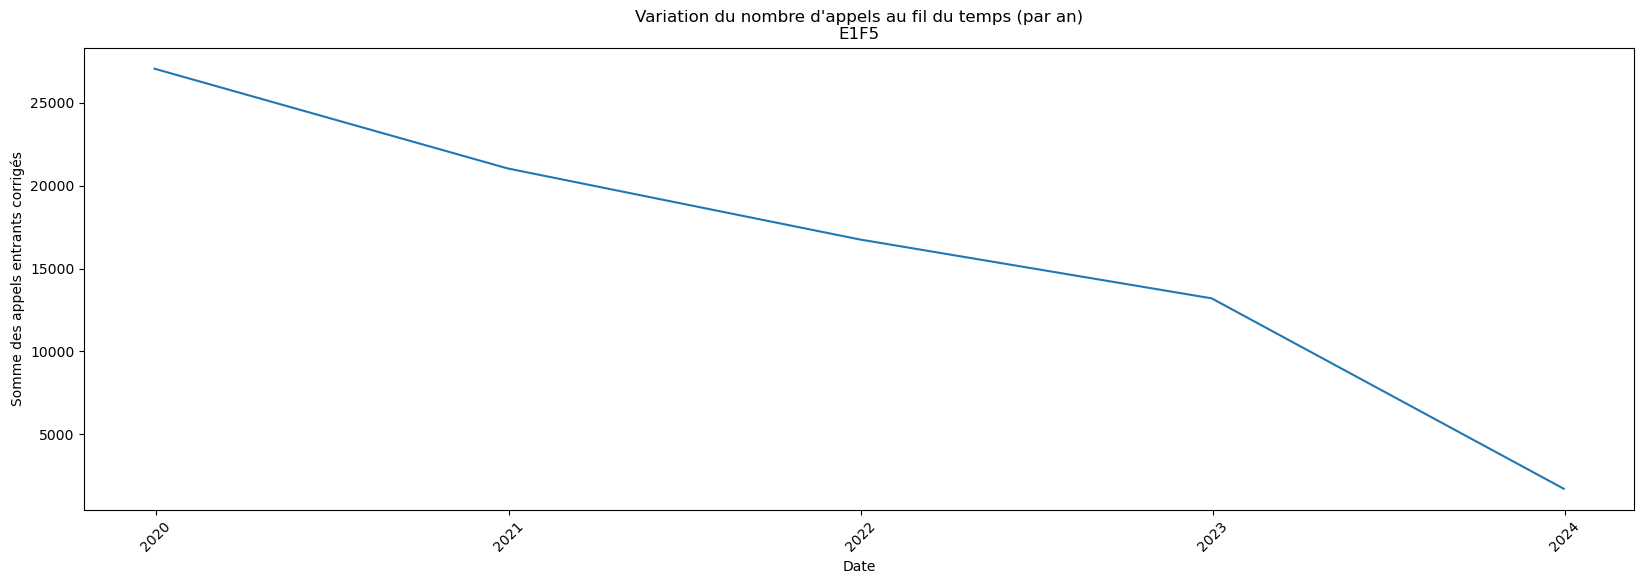

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


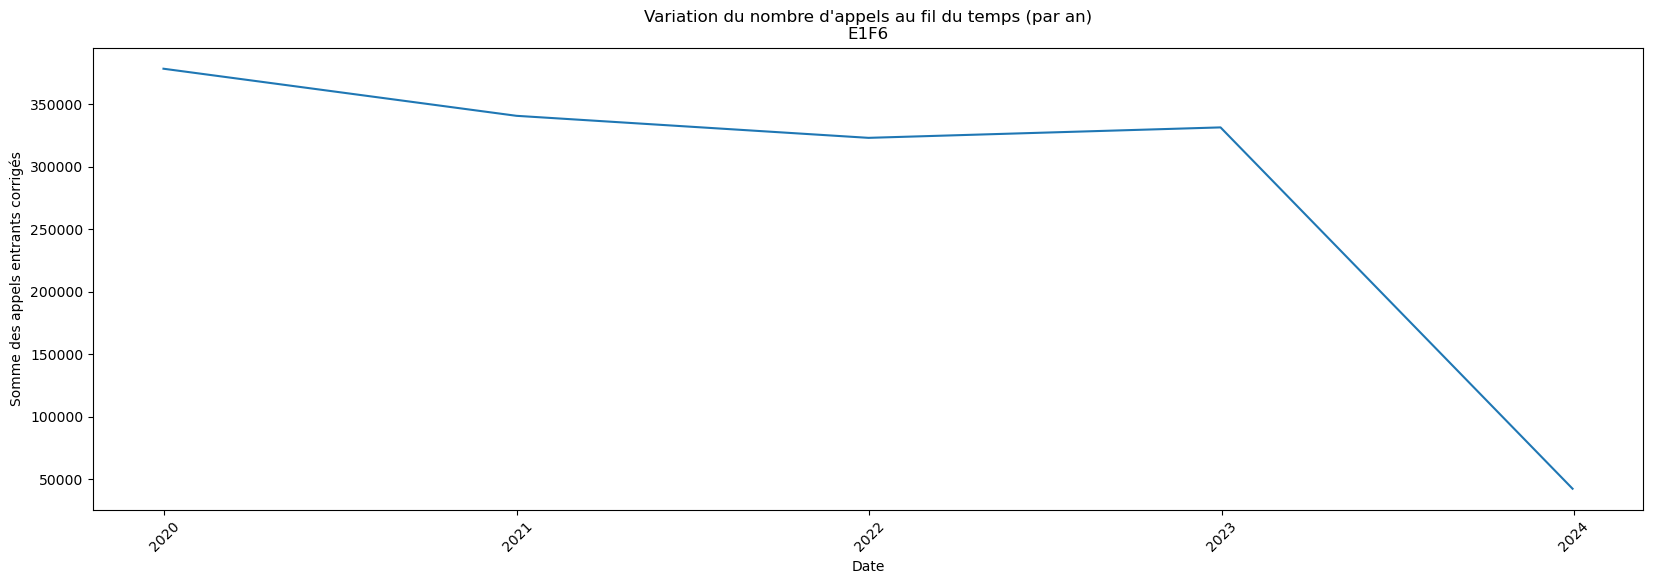

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


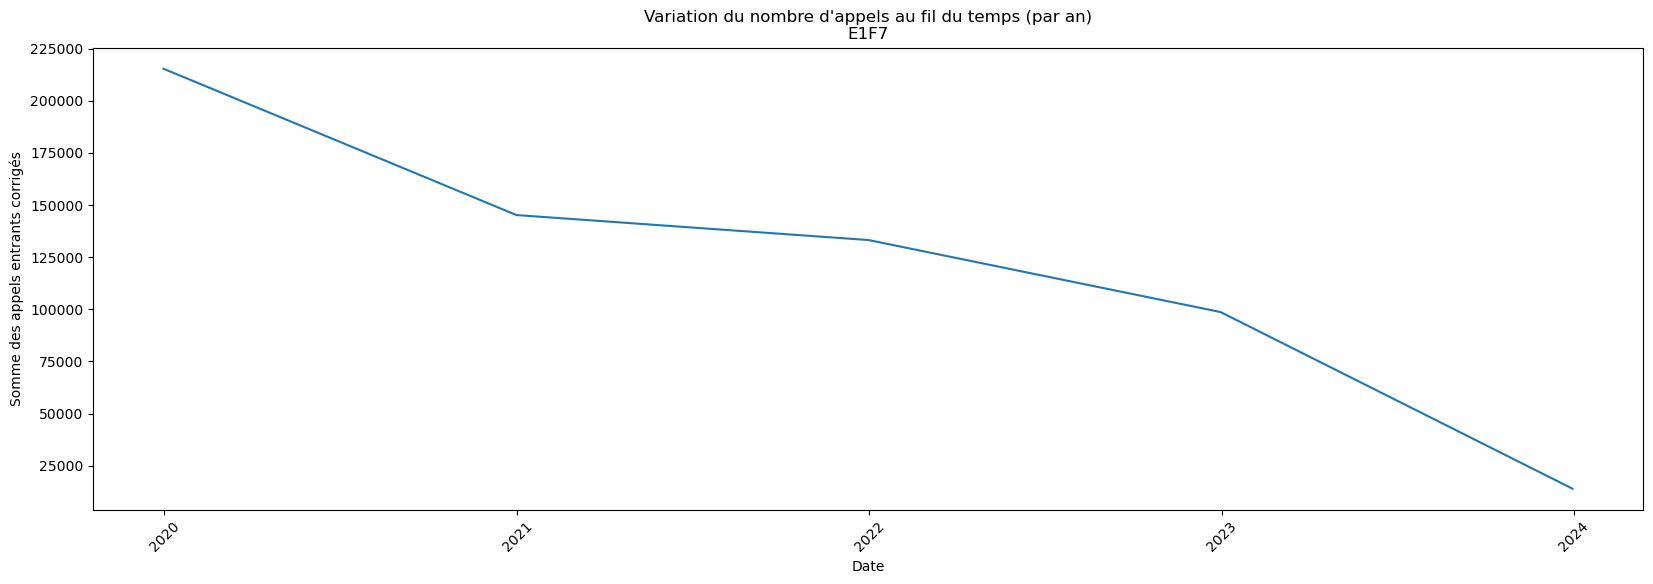

In [38]:
import matplotlib.dates as mdates

for i in range(1,8):
    # Aggregate the data by month and reset index
    exec(f"E1F_yearly = E1F{i}.groupby(pd.Grouper(key='date_appel', freq='Y')).sum().reset_index()")

   # Set the figure size
    fig, ax = plt.subplots(figsize=(20, 6))

    # Create the line plot
    sns.lineplot(data=E1F_yearly, x='date_appel', y='nombre_entrants_corrige')

   # Set the labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Somme des appels entrants corrigés')
    ax.set_title(f'Variation du nombre d\'appels au fil du temps (par an)\nE1F{i}')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

     # Set the x-axis major ticks to display every month
    ax.xaxis.set_major_locator(mdates.YearLocator())
    # Format the x-axis labels to display the month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Display the plot
    plt.show()

##### les familles par mois :

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


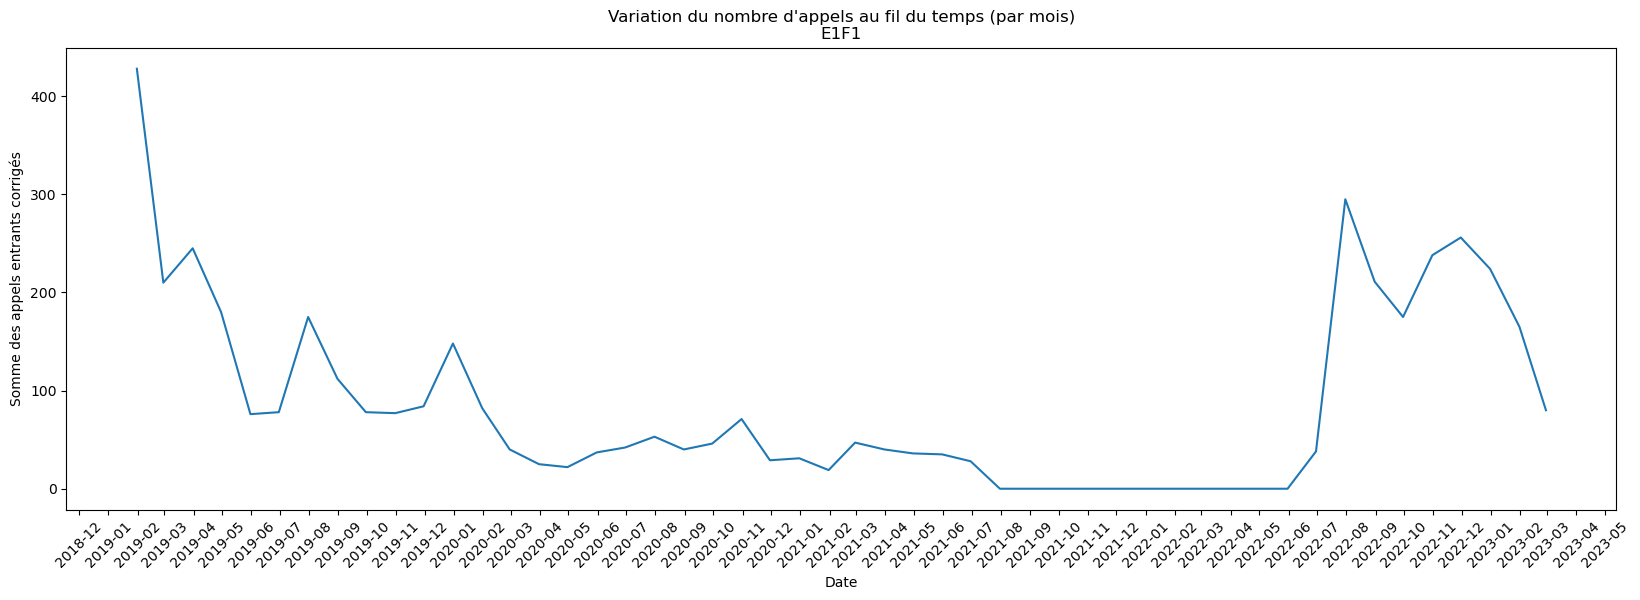

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


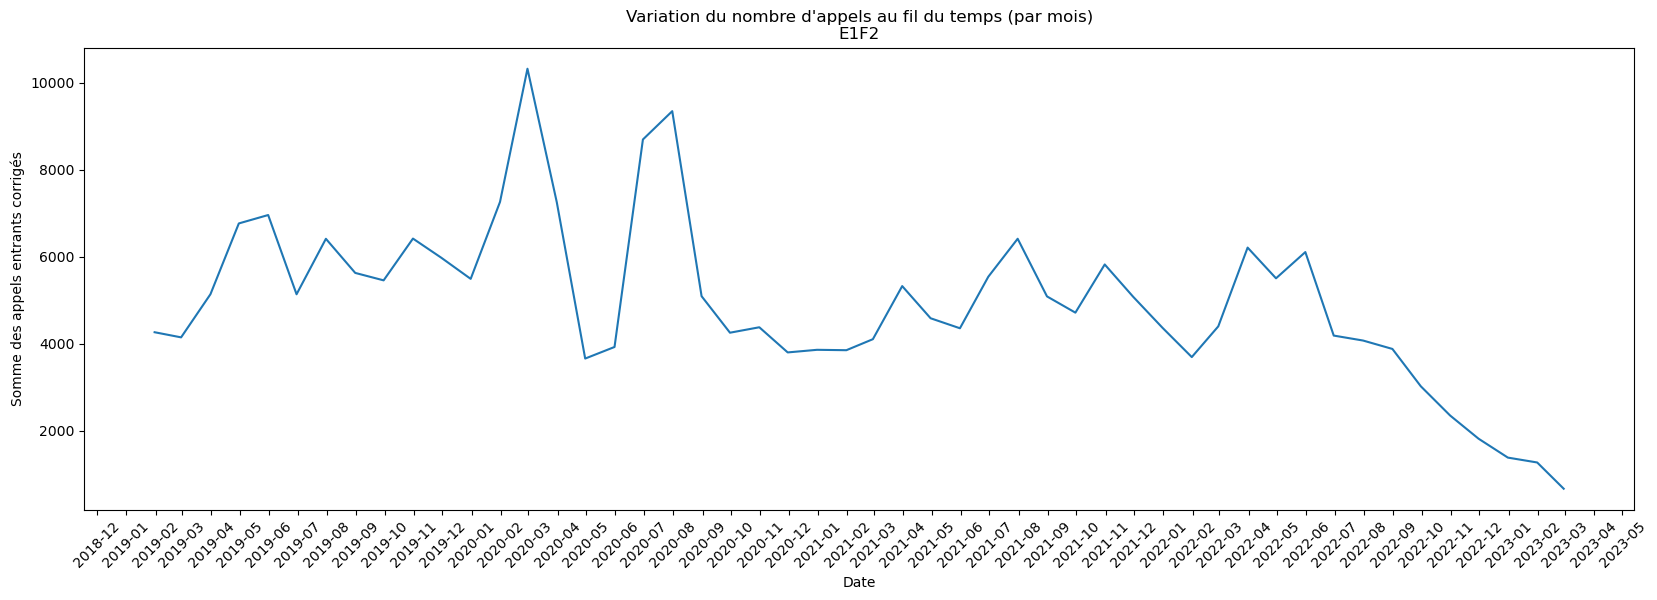

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


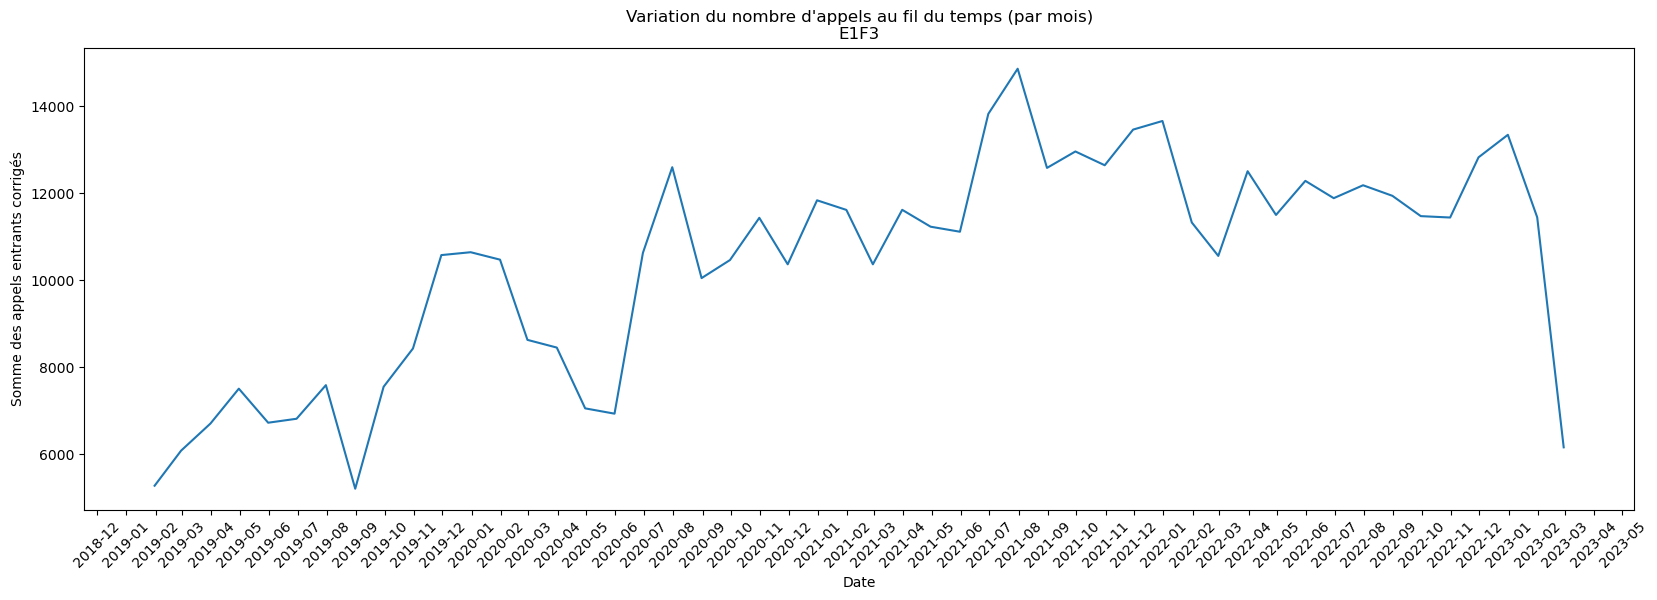

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


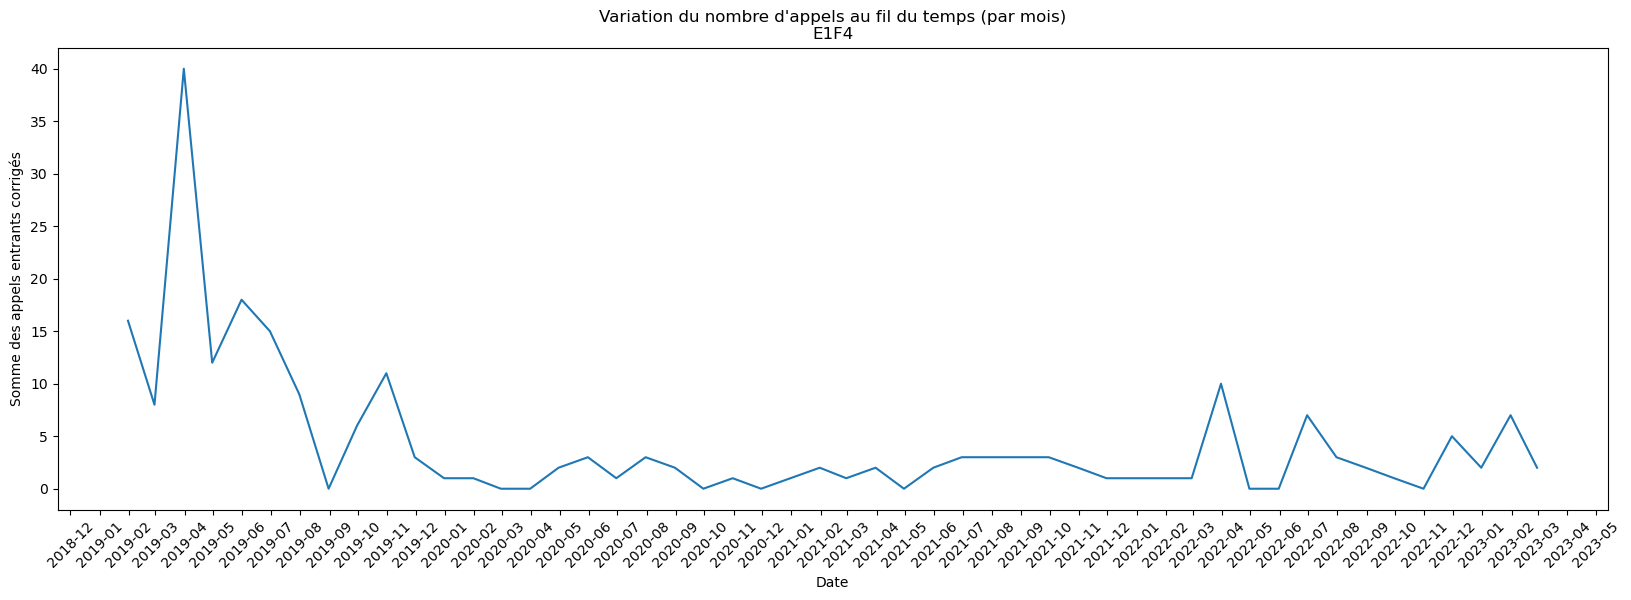

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


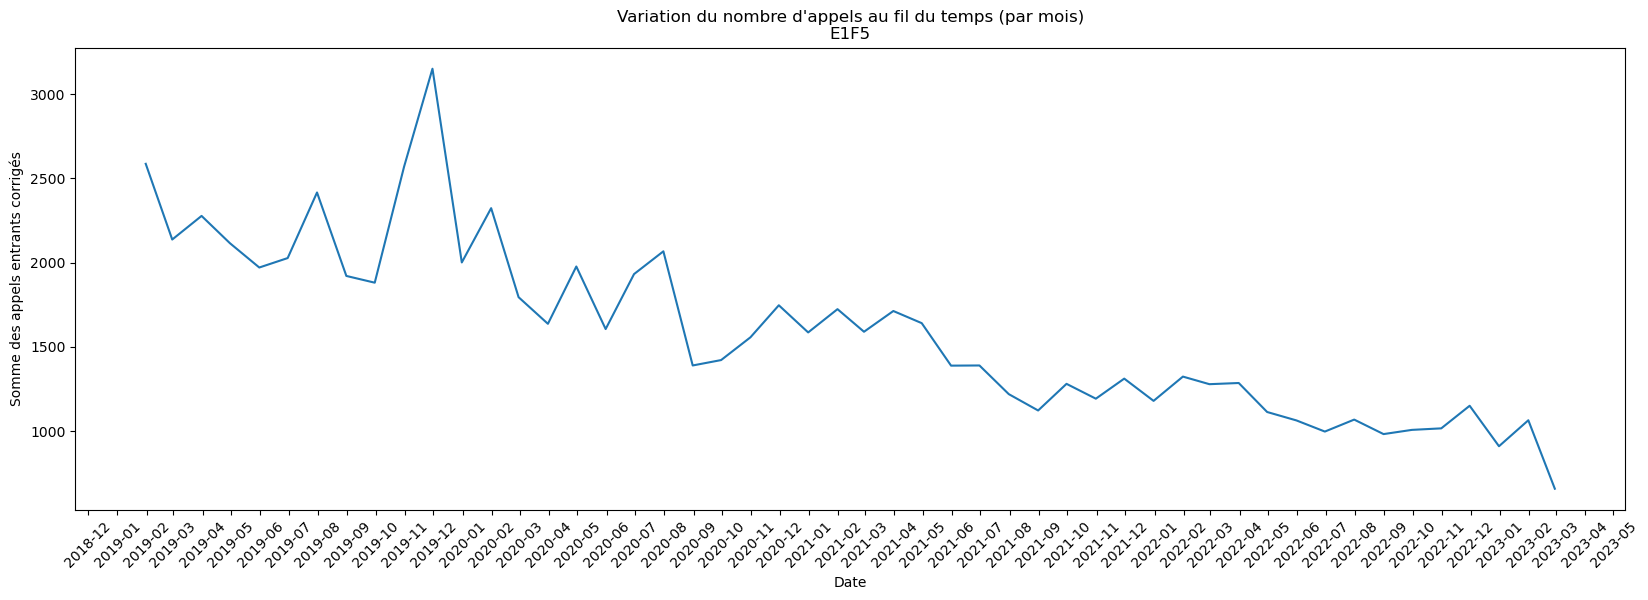

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


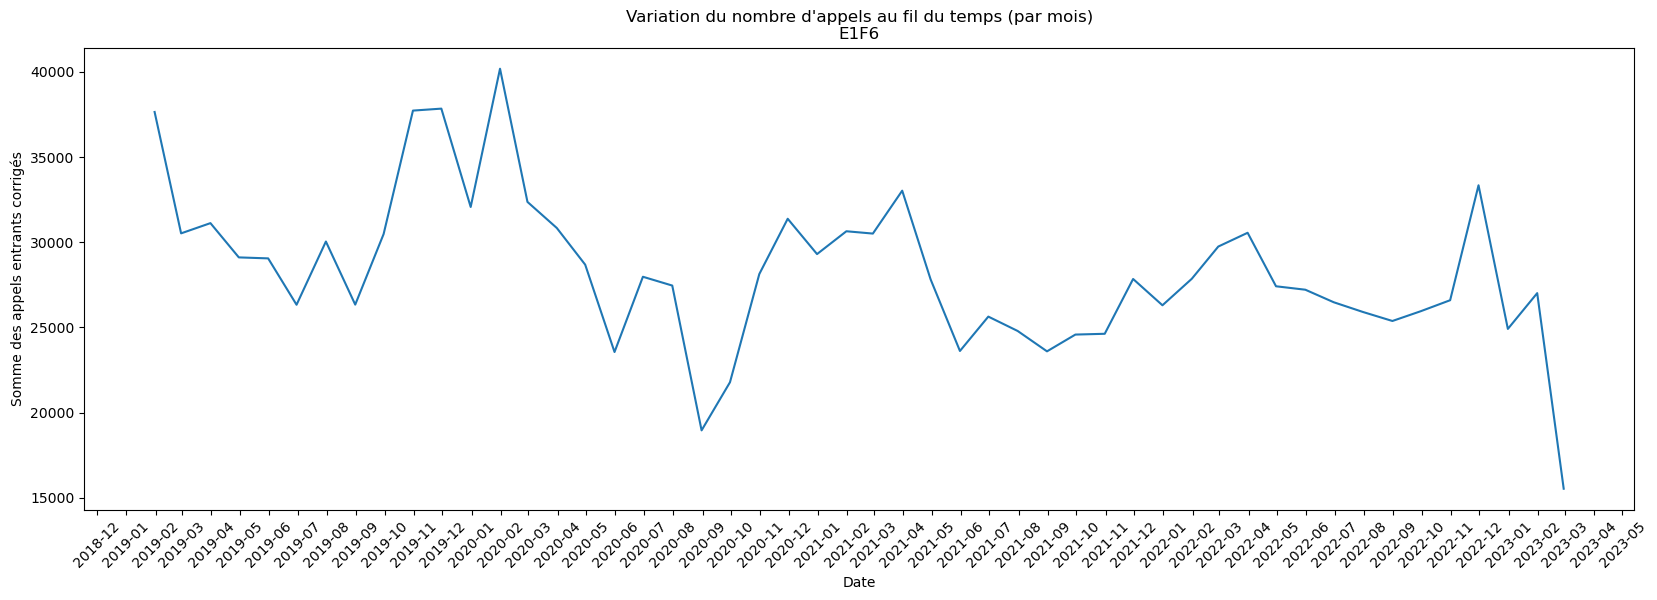

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


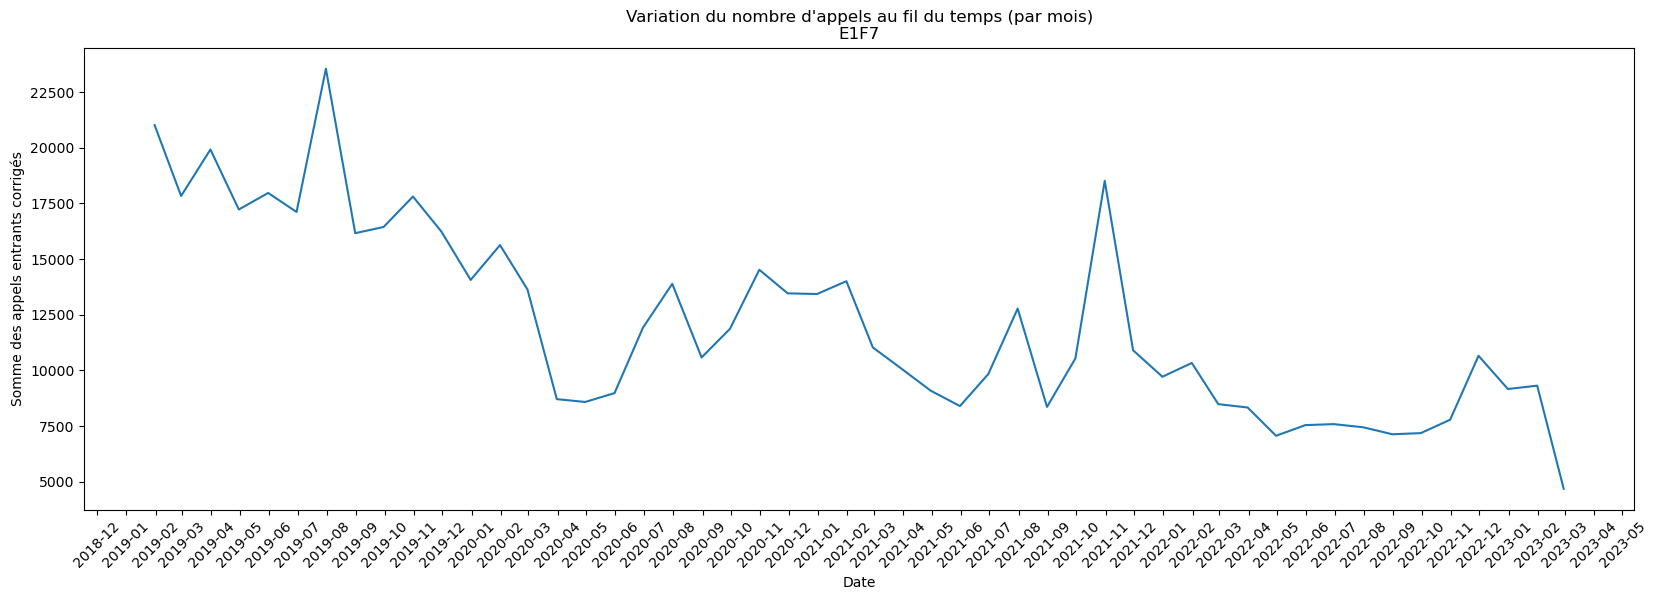

In [39]:
for i in range(1,8):
    # Aggregate the data by month and reset index
    exec(f"E1F_monthly = E1F{i}.groupby(pd.Grouper(key='date_appel', freq='M')).sum().reset_index()")

   # Set the figure size
    fig, ax = plt.subplots(figsize=(20, 6))

    # Create the line plot
    sns.lineplot(data=E1F_monthly, x='date_appel', y='nombre_entrants_corrige')

   # Set the labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Somme des appels entrants corrigés')
    ax.set_title(f'Variation du nombre d\'appels au fil du temps (par mois)\nE1F{i}')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

     # Set the x-axis major ticks to display every month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    # Format the x-axis labels to display the month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # Display the plot
    plt.show()



##### le familles par semaines :

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


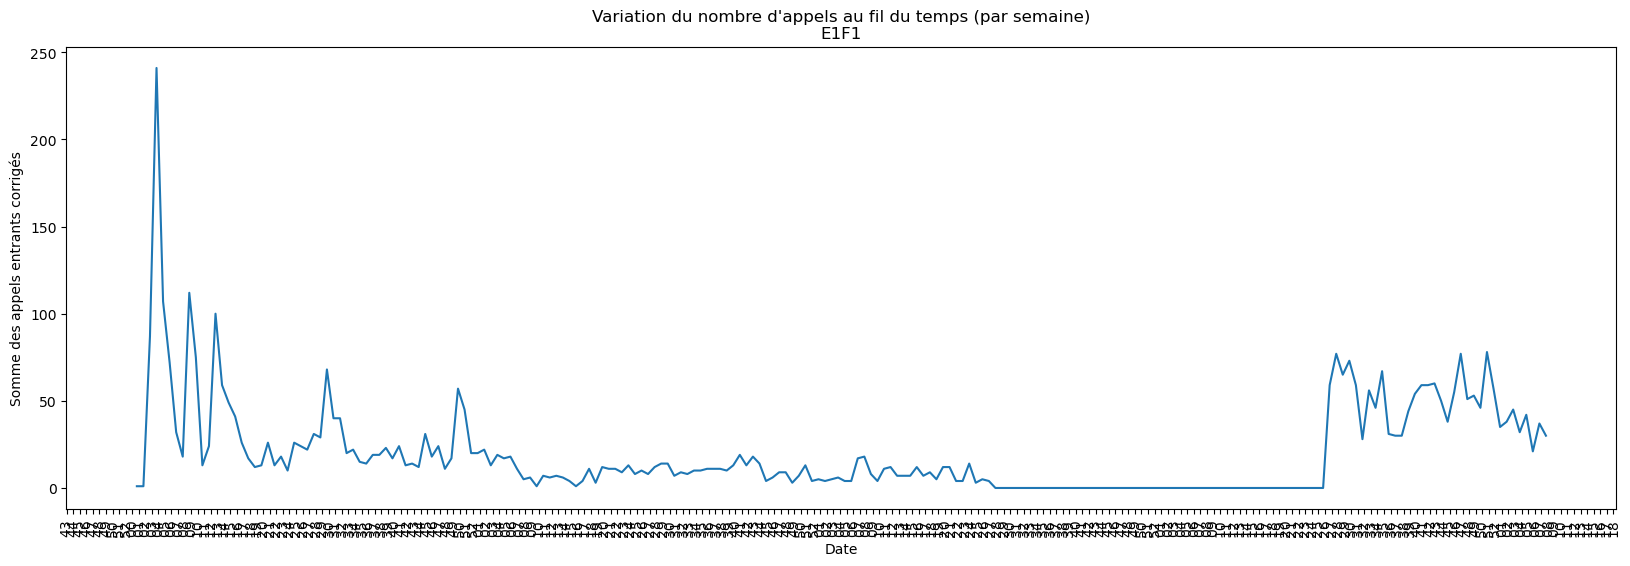

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


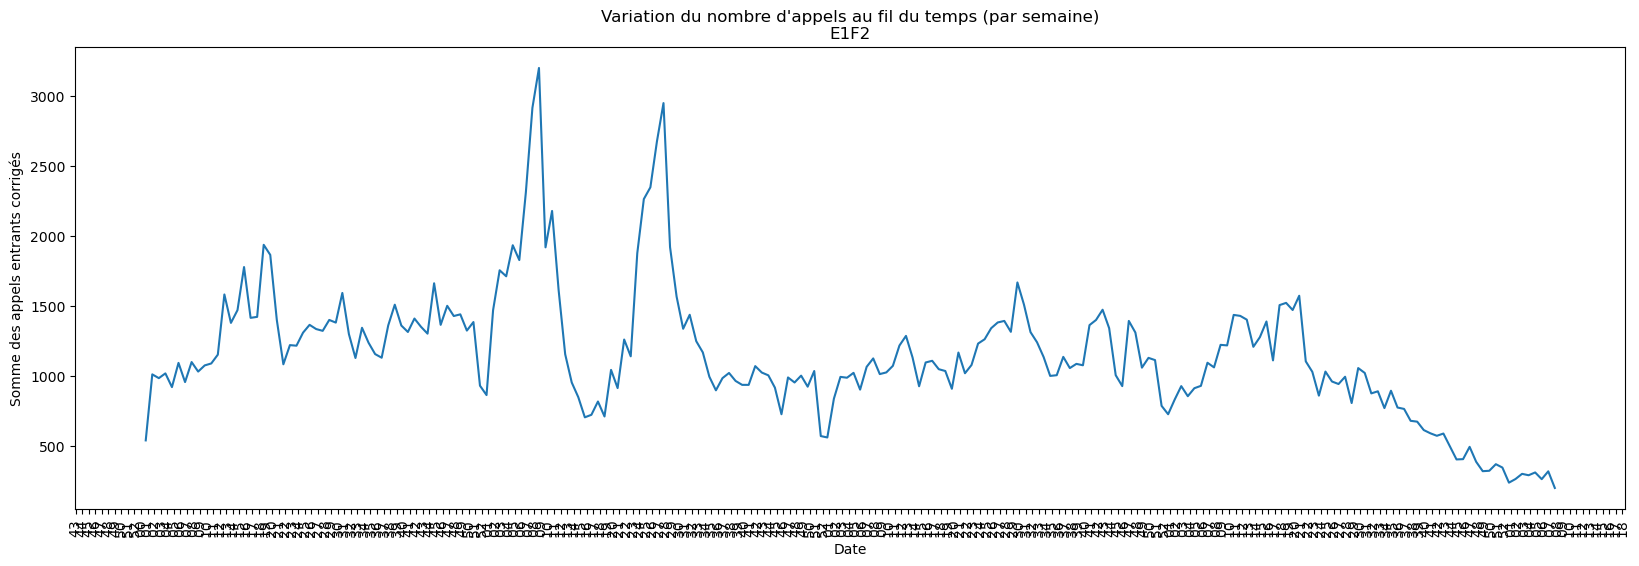

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


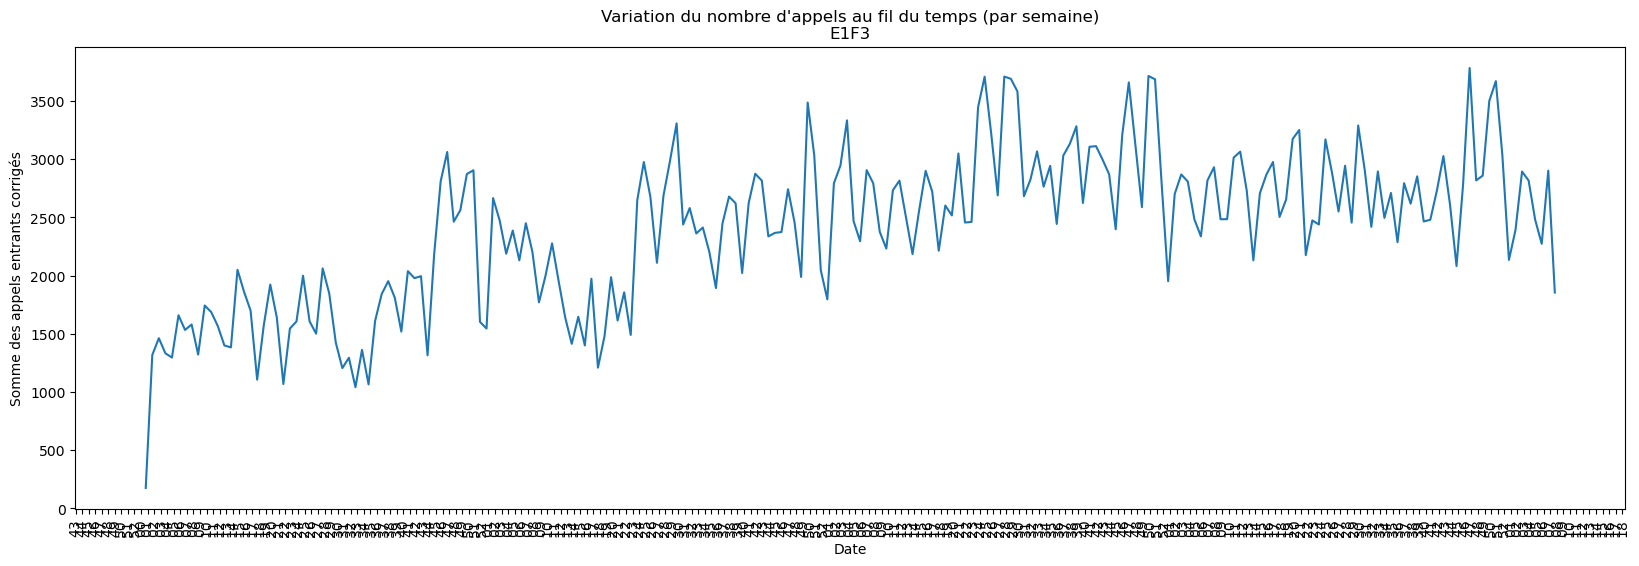

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


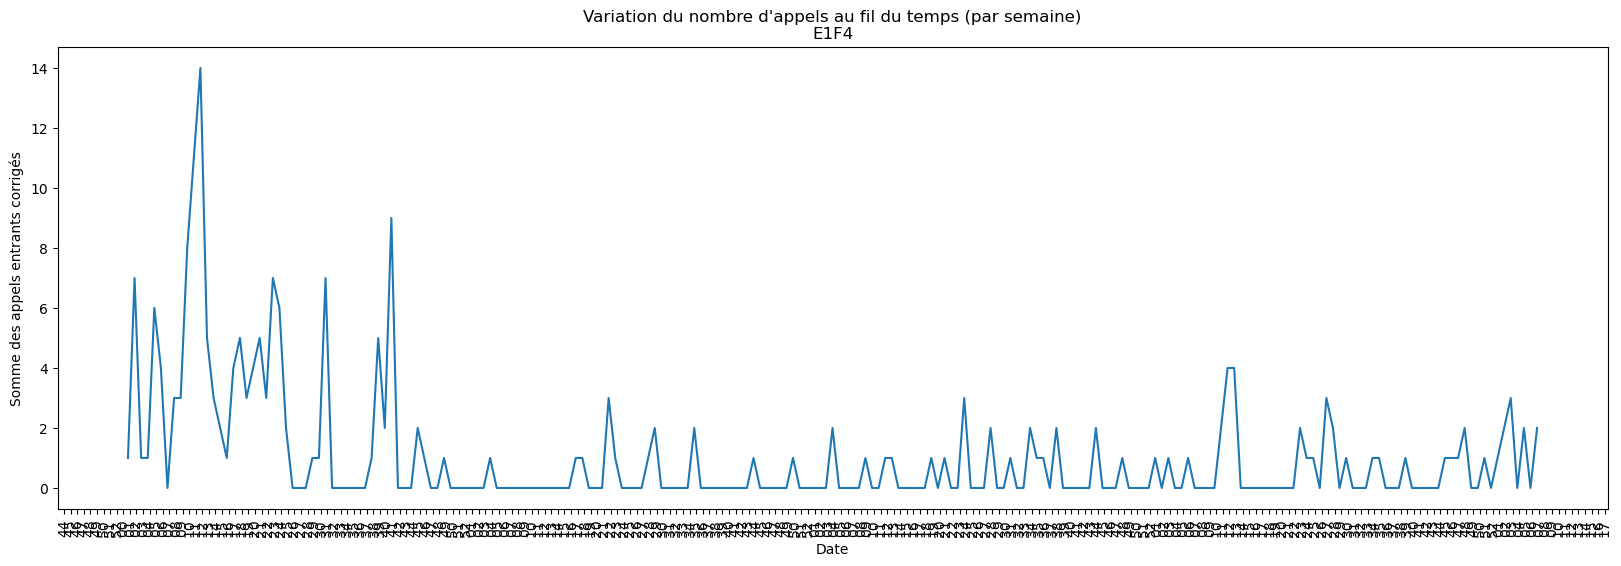

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


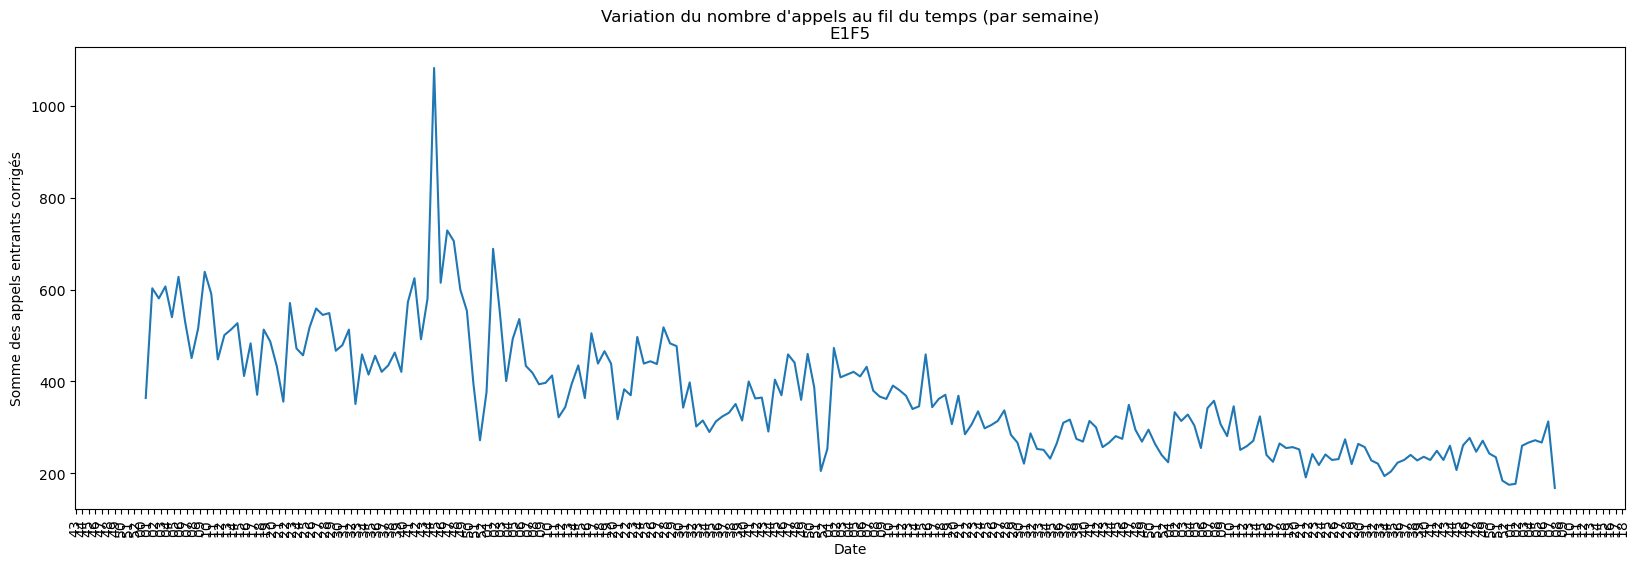

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


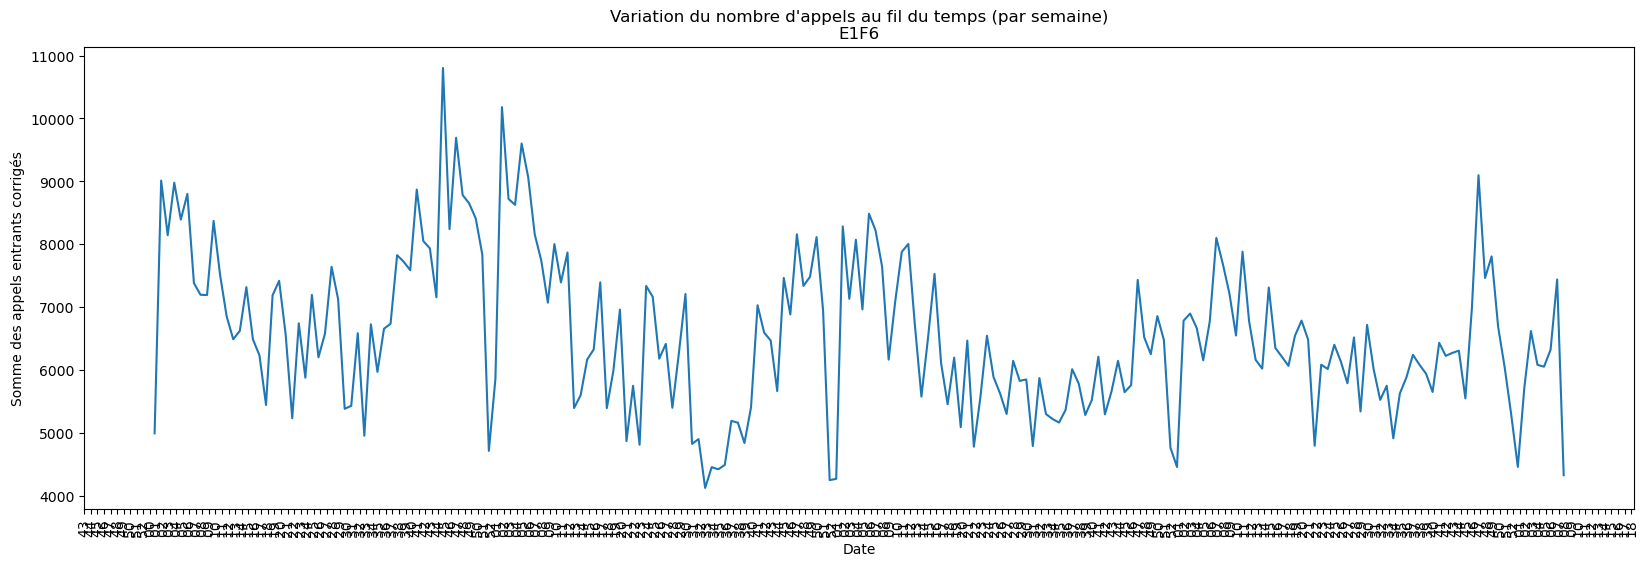

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


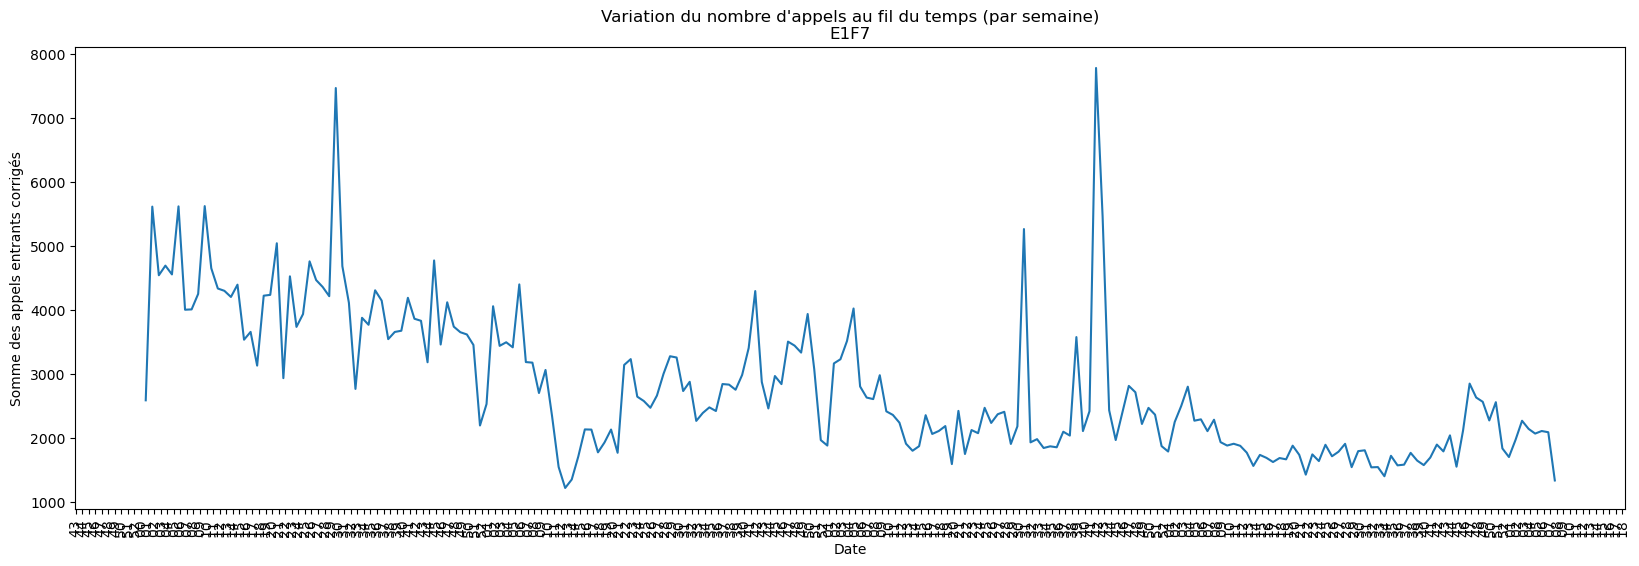

In [40]:
for i in range(1,8):
    # Aggregate the data by month and reset index
    exec(f"E1F_weekly = E1F{i}.groupby(pd.Grouper(key='date_appel', freq='W')).sum().reset_index()")

   # Set the figure size
    fig, ax = plt.subplots(figsize=(20, 6))

    # Create the line plot
    sns.lineplot(data=E1F_weekly, x='date_appel', y='nombre_entrants_corrige')

   # Set the labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Somme des appels entrants corrigés')
    ax.set_title(f'Variation du nombre d\'appels au fil du temps (par semaine)\nE1F{i}')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)

     # Set the x-axis major ticks to display every month
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    # Format the x-axis labels to display the month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%W'))
    # Display the plot
    plt.show()